# Acquire data from Google Sheets

In [1]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [7]:
import pandas as pd
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1YgjesgjYJh315Kj823ddOlSBEr1bf3AMfDaN3c34_PU/edit?usp=sharing') # 'https://docs.google.com/spreadsheets/d/1t8YQOowjGDmUWrSXIpCA0-O09NT5a3RHCyzSzWJQDEo/edit?usp=sharing') # 'https://docs.google.com/spreadsheets/d/1YgjesgjYJh315Kj823ddOlSBEr1bf3AMfDaN3c34_PU/edit?usp=sharing')
sheet = wb.worksheet('Sheet1')
# Now that we have the tab specified it’s time to get the data. To do this we will just call the get_all_values() function off of the sheet object we created above:
data = sheet.get_all_values()

df = pd.DataFrame(data[1:])
df.columns = data[0]

In [8]:
import pandas as pd
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1d5qN8WEGCkba-1aMvqmUOAB74IJUdHqwWs_d8Ui54aI/edit?usp=sharing') # 'https://docs.google.com/spreadsheets/d/1t8YQOowjGDmUWrSXIpCA0-O09NT5a3RHCyzSzWJQDEo/edit?usp=sharing') # 'https://docs.google.com/spreadsheets/d/1YgjesgjYJh315Kj823ddOlSBEr1bf3AMfDaN3c34_PU/edit?usp=sharing')
sheet = wb.worksheet('Sheet1')
# Now that we have the tab specified it’s time to get the data. To do this we will just call the get_all_values() function off of the sheet object we created above:
data2 = sheet.get_all_values()

df2 = pd.DataFrame(data2[1:])
df2.columns = data2[0]

In [9]:
import numpy as np
df[df==''] = np.nan
df = df.drop('Red', axis=1)
df = df.dropna(axis=0)

df2[df2==''] = np.nan
df2 = df2.drop('Red', axis=1)
df2 = df2.dropna(axis=0)

df3 = pd.concat([df, df2], axis=0)

df3.to_csv('PurpleColorConstituentsSurveyData.csv', index=None)

# Read the cleaned data back into a pandas data frame

In [10]:
myData = pd.read_csv('PurpleColorConstituentsSurveyData.csv')
myData

,Blue,Green,Purple,Date
0,17,85,0,7/14/2020 16:55:09
1,95,33,0,7/14/2020 16:55:28
2,98,34,0,7/14/2020 16:56:16
3,168,78,1,7/14/2020 16:56:46
4,28,72,0,7/14/2020 15:36:14
...,...,...,...,...
263,49,231,0,2020-08-13 15:46:23
264,139,49,1,2020-08-13 15:46:51
265,216,191,0,2020-08-13 15:47:09
266,144,1,1,2020-08-13 15:47:26


# Sklearn Logistic Regression model

In [11]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics


X=myData[['Green', 'Blue']]  # Features
y=myData['Purple']  # Labels

myModel = LogisticRegression()
myModel.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred = myModel.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0])

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix_0 = confusion_matrix (y, y_pred)
confusion_matrix_0

array([[175,  16],
       [ 41,  36]])

# Lets test the trained model!


In [21]:
# red = int(input('enter the red value: '))
blue = int(input('enter the blue value: '))
green = int(input('enter the green value: '))

enter the blue value: 38
enter the green value: 187


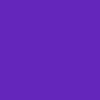

In [22]:
inputColor = np.asarray([blue,green])

from colorsys import hsv_to_rgb
from PIL import Image

colors = []
for hue in range(100):
    for sat in range(100):
        # Convert color from HSV to RGB
        rgb = [100, inputColor[0], inputColor[1]]
        colors.extend(rgb)

im = Image.frombytes("RGB", (100, 100), bytes(colors))
im


In [23]:
myModel.predict([[inputColor[0], inputColor[1]]])[0]

1

In [20]:
for i in range(50):
  for j in range(255):
    print(str(i) + " " + str(j) + " " + str(myModel.predict([[i,j]])[0]))


Streaming output truncated to the last 5000 lines.
30 101 0
30 102 0
30 103 0
30 104 0
30 105 0
30 106 0
30 107 0
30 108 0
30 109 0
30 110 0
30 111 0
30 112 0
30 113 0
30 114 0
30 115 0
30 116 0
30 117 0
30 118 0
30 119 0
30 120 0
30 121 0
30 122 0
30 123 0
30 124 0
30 125 0
30 126 0
30 127 0
30 128 0
30 129 0
30 130 0
30 131 0
30 132 1
30 133 1
30 134 1
30 135 1
30 136 1
30 137 1
30 138 1
30 139 1
30 140 1
30 141 1
30 142 1
30 143 1
30 144 1
30 145 1
30 146 1
30 147 1
30 148 1
30 149 1
30 150 1
30 151 1
30 152 1
30 153 1
30 154 1
30 155 1
30 156 1
30 157 1
30 158 1
30 159 1
30 160 1
30 161 1
30 162 1
30 163 1
30 164 1
30 165 1
30 166 1
30 167 1
30 168 1
30 169 1
30 170 1
30 171 1
30 172 1
30 173 1
30 174 1
30 175 1
30 176 1
30 177 1
30 178 1
30 179 1
30 180 1
30 181 1
30 182 1
30 183 1
30 184 1
30 185 1
30 186 1
30 187 1
30 188 1
30 189 1
30 190 1
30 191 1
30 192 1
30 193 1
30 194 1
30 195 1
30 196 1
30 197 1
30 198 1
30 199 1
30 200 1
30 201 1
30 202 1
30 203 1
30 204 1
30 205 1
30 2